Author: **Roidouli Vasiliana**

## Libraries Importing and Dataset Loading

In [49]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [51]:
# Load dataset
df = pd.read_csv("/content/gdrive/MyDrive/stout/casestudy.csv")

## A Quick Look on the Dataset

* Properties of the Dataset: 

In [52]:
df.shape 

(685927, 4)

In [53]:
df.sample(5) 

,Unnamed: 0,customer_email,net_revenue,year
120303,120303,cmcuuzbumb@gmail.com,89.90,2015
252212,252212,amsafbaeko@gmail.com,232.02,2016
362534,362534,ieuzalbfcn@gmail.com,108.60,2016
603501,603501,huzwqlnvrz@gmail.com,230.12,2017
299821,299821,njzdbiaqxz@gmail.com,124.64,2016


In [54]:
df = df.rename(columns={'Unnamed: 0': 'index'})

In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,685927.0,342963.000000,198010.213385,0.0,171481.50,342963.00,514444.50,685926.0
net_revenue,685927.0,125.647755,71.854528,1.0,63.51,125.73,187.82,250.0
year,685927.0,2016.027252,0.837203,2015.0,2015.00,2016.00,2017.00,2017.0


In [56]:
df.describe(include='object').T

,count,unique,top,freq
customer_email,685927,604618,wtbxliuywf@gmail.com,3


* Check for missing values: 

In [57]:
def plot_null_values(df):
  if df.isnull().sum().sum() != 0:
    na_df = (df.isnull().sum() / len(df)) * 100
    na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
    missing_data.plot(kind = "barh")
    plt.show()
  else:
    print('No NAs found')
  return

In [58]:
plot_null_values(df)

No NAs found


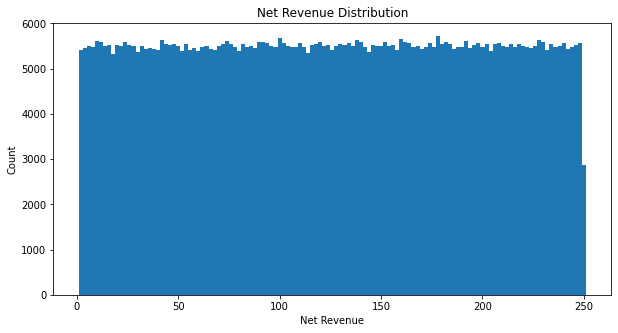

In [59]:
# Distribution of Net Revenue
binsize = 2
interest_rate_perc = df['net_revenue']
bins = np.arange(df['net_revenue'].min(), df['net_revenue'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(x = interest_rate_perc, bins = bins)
plt.title('Net Revenue Distribution')
plt.xlabel('Net Revenue')
plt.ylabel('Count')
plt.show()

In [60]:
df['year'].value_counts()

2017    249987
2015    231294
2016    204646
Name: year, dtype: int64

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

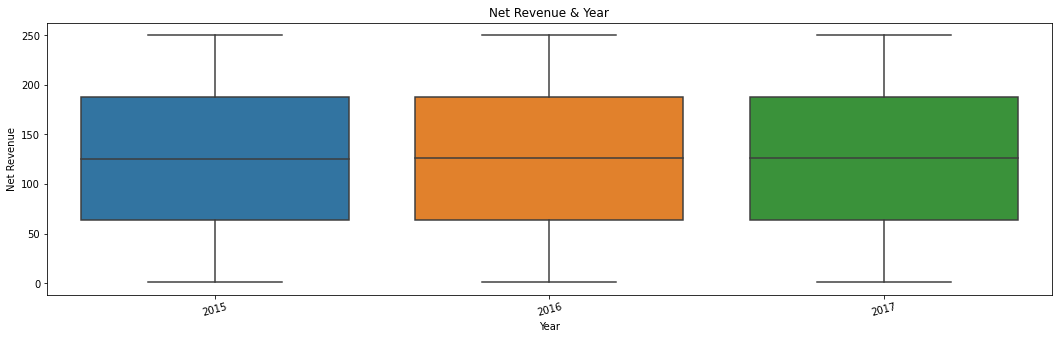

In [61]:
plt.figure(figsize = [18, 5])
sns.boxplot(data=df,y='net_revenue',x='year')
plt.title('Net Revenue & Year')
plt.ylabel('Net Revenue')
plt.xlabel('Year')
plt.xticks(rotation=15)

## Calculations 

The following functions sum up the desired output values for the years 2017 and 2016. Looking at each year, you can find information about the current and the previous year. In this way, information for year 2015 is also provided.

In [62]:
def print_results(year, customers, revenue, prev_revenue, new_customers, per_new_customers, 
                  new_customer_revenue, per_new_customer_revenue,
                  existing_customers, per_existing_customers, exist_curr_revenue,
                  exist_prev_revenue, growth, lost_customers, revenue_lost, 
                  customers_prev):
  
  print('#########' + str(year) + '#########')
  print(' No. of Customers in Curr Year:                            ', customers)
  print(' No. of Customers in Prev Year:                            ', customers_prev)
  print(' No. of New Customers:                                     ', new_customers)
  print(' Percentage of New Customers:                              ', per_new_customers)
  print(' No. of Existing Customers from Prev Year:                 ', existing_customers)
  print(' Percentage of Existing Customers from Prev Year:          ', per_existing_customers)
  print(' No. of Lost Customers:                                    ', lost_customers)
  print()
  print(' Total Revenue in $:                                       ', revenue)
  print(' Total Revenue in $ for Prev Year:                         ', prev_revenue)
  print(' New-Customer-Revenue in $:                                ', new_customer_revenue)
  print(' Percentage of New-Customer-Revenue:                       ', per_new_customer_revenue)
  print(' Total Revenue of Existing Customers in $:                 ', exist_curr_revenue)
  print(' Total Revenue of Existing Customers in $ for Prev Year:   ', exist_prev_revenue)
  print(' Total Revenue Lost due to Attrition in $:                 ', revenue_lost)
  print()
  print(' Existing-Customer-Growth in $:                            ', growth)
  
  return 

In [63]:
def calculate(df, curr_year, prev_year):
  df_curr = df[(df['year'] == curr_year)]
  df_prev = df[(df['year'] == prev_year)]

  # Calculate Total Revenue of Curr Year
  net_revenue_total = df_curr['net_revenue'].sum()

  # Calculate Total Revenue of Prev Year
  net_revenue_total_prev = df_prev['net_revenue'].sum()

  # Find the number of unique customers of Curr Year
  unique_customers_list = df_curr['customer_email'].unique().tolist()
  unique_customers = len(unique_customers_list)

  # Find the number of unique customers of Prev Year
  unique_prev_customers_list = df_prev['customer_email'].unique().tolist()
  unique_prev_customers = len(unique_prev_customers_list)

  # Calculate New-Customer-Revenue 
  # New-Customer-Revenue = Total Revenue from New Customers / Total Revenue

  # Keep dataset with only New Customers for Curr Year
  customers_curr = set(unique_customers_list)  
  
  # Keep dataset with only New Customers for Prev Year
  unique_customers_prev_list = df_prev['customer_email'].unique().tolist()
  customers_prev = set(unique_customers_prev_list)

  # Find Customers that exist both in Curr and Prev Year
  customers_joint = list(customers_curr.intersection(customers_prev))

  # Indicate which rows contain new customers
  # with the ~ operator we keep the customers that 
  # do not belong to the joint of customers that exist both in 
  # previous and current years -> these are the new customers.
  new_customers_mask = ~df_curr['customer_email'].isin(customers_joint)
  new_customers_curr_df = df_curr[new_customers_mask]

  # Calculate number of New Customers for Curr Year
  new_customers_list = new_customers_curr_df['customer_email'].unique().tolist()
  new_customers = len(new_customers_list)

  per_new_customers = (new_customers / unique_customers) * 100.0

  total_revenue_new_customers = new_customers_curr_df['net_revenue'].sum()
  new_customer_revenue = total_revenue_new_customers / net_revenue_total

  # Calculate the Existing-Customer-Growth
  # Existing-Customer-Growth = Total Revenue - New Customer Total Revenue
  growth = net_revenue_total - total_revenue_new_customers

  # Calculate Existing-Customer-Revenue for Curr Year
  # Indicate which rows contain existing customers
  existing_customers_curr_mask = df_curr['customer_email'].isin(customers_joint)
  existing_customers_curr_df = df_curr[existing_customers_curr_mask]

  # Calculate number of Existing Customers for Curr Year
  existing_customers_list = existing_customers_curr_df['customer_email'].unique().tolist()
  existing_customers = len(existing_customers_list)

  per_existing_customers = (existing_customers / unique_customers) * 100.0

  total_revenue_existing_customers = existing_customers_curr_df['net_revenue'].sum()
  
  existing_customers_prev_mask = df_prev['customer_email'].isin(customers_joint)
  existing_customers_prev_df = df_prev[existing_customers_prev_mask]

  total_revenue_existing_customers_prev = existing_customers_prev_df['net_revenue'].sum()

  # Find the lost customers: customers that existed in the previous year
  # but do not exist in the current year.
  difference = list(customers_prev.difference(customers_curr))
  lost_customers = len(difference)

  # Calculate Revenue Lost from Attrition
  lost_customers_mask = df_prev['customer_email'].isin(difference)
  lost_customers_df = df_prev[lost_customers_mask]
  lost_customers_revenue = lost_customers_df['net_revenue'].sum()


  print_results(year, unique_customers, net_revenue_total, net_revenue_total_prev,
                new_customers, per_new_customers, total_revenue_new_customers, 
                new_customer_revenue, existing_customers,
                per_existing_customers, total_revenue_existing_customers, 
                total_revenue_existing_customers_prev, growth, lost_customers,
                lost_customers_revenue, unique_prev_customers)
 
  return [net_revenue_total, net_revenue_total_prev, total_revenue_new_customers, 
          lost_customers_revenue, total_revenue_existing_customers, 
          total_revenue_existing_customers_prev, unique_customers, unique_prev_customers,
          new_customers, lost_customers, growth]

## Results Per Year - Visualizations

In [64]:
year = 2017

[net_rev_17, net_rev_16, new_cust_rev_17, lost_cust_rev_17, exist_cust_rev_17, 
 exist_cust_rev_prev17, cust_17, cust_16, new_cust_17, lost_cust_17,
 growth_17] = calculate(df, curr_year=2017, prev_year=2016)

#########2017#########
 No. of Customers in Curr Year:                             249987
 No. of Customers in Prev Year:                             204646
 No. of New Customers:                                      229028
 Percentage of New Customers:                               91.61596403012958
 No. of Existing Customers from Prev Year:                  20959
 Percentage of Existing Customers from Prev Year:           8.384035969870434
 No. of Lost Customers:                                     183687

 Total Revenue in $:                                        31417495.030000016
 Total Revenue in $ for Prev Year:                          25730943.59
 New-Customer-Revenue in $:                                 28776235.039999995
 Percentage of New-Customer-Revenue:                        0.9159302806452925
 Total Revenue of Existing Customers in $:                  2641259.99
 Total Revenue of Existing Customers in $ for Prev Year:    2620648.65
 Total Revenue Lost due to Attritio

In [65]:
year = 2016

[net_rev_16, net_rev_15, new_cust_rev_16, lost_cust_rev_16, exist_cust_rev_16, 
 exist_cust_rev_prev16, cust_16, cust_15, new_cust_16, lost_cust_16,
 growth_16] = calculate(df, curr_year=2016, prev_year=2015)

#########2016#########
 No. of Customers in Curr Year:                             204646
 No. of Customers in Prev Year:                             231294
 No. of New Customers:                                      145062
 Percentage of New Customers:                               70.8843564008092
 No. of Existing Customers from Prev Year:                  59584
 Percentage of Existing Customers from Prev Year:           29.1156435991908
 No. of Lost Customers:                                     171710

 Total Revenue in $:                                        25730943.59
 Total Revenue in $ for Prev Year:                          29036749.189999994
 New-Customer-Revenue in $:                                 18245491.01
 Percentage of New-Customer-Revenue:                        0.709087521263343
 Total Revenue of Existing Customers in $:                  7485452.58
 Total Revenue of Existing Customers in $ for Prev Year:    7465117.12
 Total Revenue Lost due to Attrition in $:   

##Visualizations

* `Bar Chart showing the Total Revenue for each year, broken down by new and existing customers.`

The bar chart shows the Total Revenue for the years 2016 and 2017, broken down by New and Existing customers. The "New" bar is larger than the "Existing" bar for both years, indicating that the Total Revenue from New Customers is greater than the Total Revenue from Existing Customers. In addition, the Total Revenue from New Customers has increased between the two years, while the Total Revenue from Existing Customers has decreased. This suggests that the business may be more successful at attracting new customers and generating revenue from them, but may be struggling to retain and grow its existing customer base. By looking at the bar chart, we can see that the total revenue from new and existing customers has changed over time and may need to be further analyzed in order to identify potential opportunities for improvement.

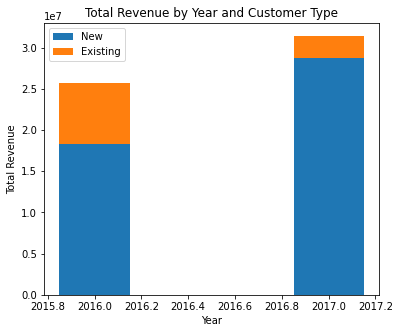

In [66]:
years = [2016, 2017]
new_cust_revenue = [new_cust_rev_16, new_cust_rev_17]
exist_cust_revenue = [exist_cust_rev_16, exist_cust_rev_17]

plt.figure(figsize = (6, 5))
plt.bar(years, new_cust_revenue, width=0.3, label="New")
plt.bar(years, exist_cust_revenue, bottom=new_cust_revenue, width=0.3, label="Existing")
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Year and Customer Type")
plt.legend()
plt.show()

* `Line Chart showing the Existing Customer Growth per year`.

The line chart shows the Existing Customer Growth for the years 2016 and 2017. The line starts at a relatively high point in 2016 and decreases over time, indicating that the Existing Customer Growth has declined between the two years. This may be due to a variety of factors, such as increased competition, changes in customer preferences, or shifts in the market. By looking at the line chart, we can see that the Existing Customer Growth has decreased over time and may need to be addressed in order to maintain the health of the business.

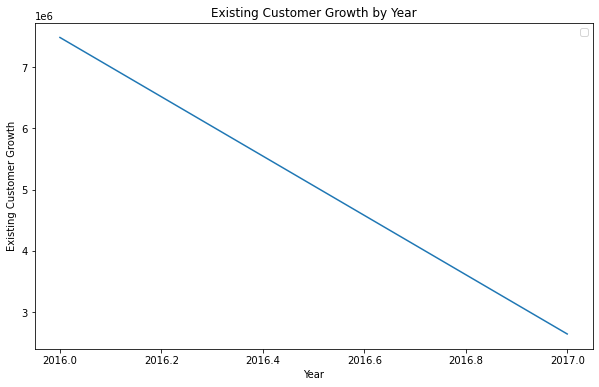

In [67]:
years = [2016, 2017]
growth = [growth_16, growth_17]

plt.figure(figsize = (10, 6))
plt.plot(years, growth)
plt.xlabel("Year")
plt.ylabel("Existing Customer Growth")
plt.title("Existing Customer Growth by Year")
plt.legend()
plt.show()

* `Bar chart showing the Total Revenue of each year`

The bar chart shows the Total Revenue for the years 2015, 2016, and 2017. The Total Revenue for 2017 is larger than those of 2016 and 2015, indicating that the business has experienced overall Revenue Growth over the three-year period. However, the Total Revenue of 2016 is smaller than the one of 2015, suggesting that the business may have experienced a temporary dip in Revenue between these two years. This may be due to a variety of factors, such as changes in market conditions, shifts in customer preferences, or the introduction of new competitors. By looking at the bar chart, we can see that the Total Revenue has changed over time and may need to be further analyzed in order to identify potential opportunities for improvement.

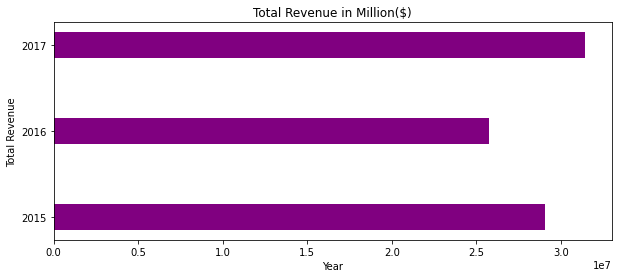

In [68]:
# Total Revenue
data = {'2015': net_rev_15 ,'2016': net_rev_16,'2017': net_rev_17}
x = list(data.keys())
y = list(data.values()) 
fig = plt.figure(figsize = (10, 4))
plt.barh(x, y, height=0.3, color='purple')
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.title("Total Revenue in Million($)")
plt.grid(False)
plt.show()

* `Bar Chart showing the Total Revenue`

The bar chart shows the New Customers' Revenue, the Revenue Lost from Attrition, and the Total Revenue for the years 2016 and 2017. The Total Revenue had increased between the two years, indicating that the business has been successful in generating overall Revenue Growth. However, the Revenue Lost from Attrition is almost the same for both years, suggesting that the business may be struggling to retain its existing customer base. The New Customers' Revenue has also changed between the two years, with the Revenue Lost being larger than the New Customers' Revenue in 2016, and the opposite happening in 2017. This indicates that the business may have experienced changes in its ability to attract and generate revenue from new customers over time. By looking at the bar chart, we can see that the revenue from different sources has changed over time and may need to be further analyzed in order to identify potential areas for improvement.

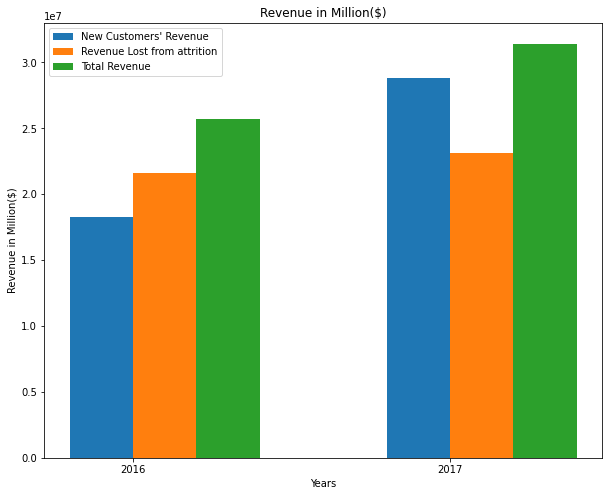

In [69]:
#  Revenue
years = ['2016', '2017']
revenue_total = [net_rev_16, net_rev_17]
revenue_lost = [lost_cust_rev_16, lost_cust_rev_17]
revenue_new_cust = [new_cust_rev_16, new_cust_rev_17]

  
fig = plt.figure(figsize = (10, 8))  
X_axis = np.arange(len(years))
  
plt.bar(X_axis - 0.1, revenue_new_cust, 0.2, label = "New Customers' Revenue")
plt.bar(X_axis + 0.1, revenue_lost, 0.2, label = "Revenue Lost from attrition")
plt.bar(X_axis + 0.3, revenue_total, 0.2, label = "Total Revenue")

plt.xticks(X_axis, years)
plt.xlabel("Years")
plt.ylabel("Revenue in Million($)")
plt.title("Revenue in Million($)")
plt.legend()
plt.show()

* `Bar Chart showing the total Customers for each year`

The bar chart shows the total number of Customers for the years 2015, 2016, and 2017. The total number of Customers has changed over time, with the number of Customers in 2017 being larger than those of the other years. This may indicate that the business has been successful at attracting New Customers and growing its Customer Base over the three-year period. However, the number of Customers in 2015 is larger than the number of Customers in 2016, suggesting that the business may have experienced a temporary dip in the number of Customers between these two years. This may be due to a variety of factors, such as changes in market conditions, shifts in Customer preferences, or the introduction of new competitors. By looking at the bar chart, we can see how the total number of Customers has changed over time and may need to be further analyzed in order to identify potential opportunities for improvement.

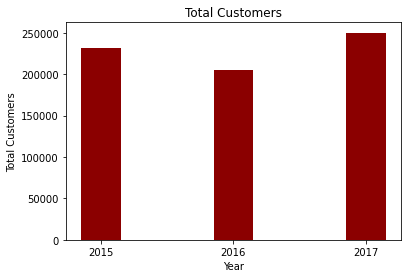

In [70]:
data = {'2015': cust_15,'2016': cust_16,'2017': cust_17}
x = list(data.keys())
y = list(data.values()) 
fig = plt.figure(figsize = (6, 4))
plt.bar(x, y, width=0.3, color='darkred')
plt.xlabel("Year")
plt.ylabel("Total Customers")
plt.title("Total Customers")
plt.grid(False)
plt.show()

* `Bar Chart showing the total, new and lost Customers`

The bar chart shows the total, new, and lost Customers for the years 2016 and 2017. The total number of Customers has increased between the two years, with the number of total Customers in 2017 being larger than those of 2016. This may indicate that the business has been successful at attracting new Customers and growing its overall customer base. However, the number of lost Customers is almost the same for both years, suggesting that the business may be struggling to retain its existing Customers. The number of new Customers has also changed between the two years, with the number of new Customers being higher in 2017 than in 2016. This may indicate that the business has experienced changes in its ability to attract new Customers over time. By looking at the bar chart, we can see how the total, new, and lost Customers have changed over time and may need to be further analyzed in order to identify potential opportunities for improvement.

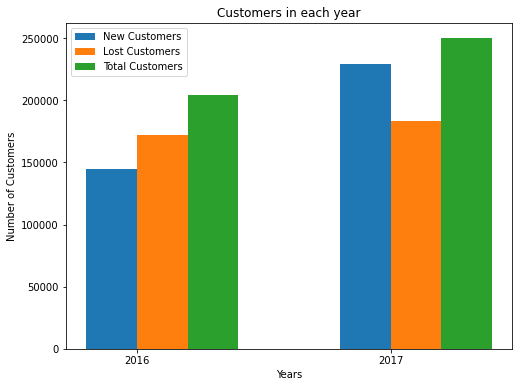

In [71]:
X_years = ['2016', '2017']
new_customers = [new_cust_16, new_cust_17]
lost_customers = [lost_cust_16, lost_cust_17]
total_customers = [cust_16, cust_17]
  
X_axis = np.arange(len(X_years))
fig = plt.figure(figsize = (8, 6))  
plt.bar(X_axis - 0.1, new_customers, 0.2, label = 'New Customers')
plt.bar(X_axis + 0.1, lost_customers, 0.2, label = 'Lost Customers')
plt.bar(X_axis + 0.3, total_customers, 0.2, label = 'Total Customers')
  
plt.xticks(X_axis, X_years)
plt.xlabel("Years")
plt.ylabel("Number of Customers")
plt.title("Customers in each year")
plt.legend()
plt.show()